In [1]:
import pandas as pd

In [2]:
# Carregando a amostra fornecida em um novo arquivo menor
file_sample_path = 'data/CelularesSubtraidos_2024.xlsx'
data = pd.read_excel(file_sample_path)

# Visualizando as primeiras linhas para análise
data.head()


,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,VERSAO,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,...,DESCR_MODO_OBJETO,DESCR_TIPO_OBJETO,DESCR_SUBTIPO_OBJETO,DESCR_UNIDADE,QUANTIDADE_OBJETO,MARCA_OBJETO,FLAG_BLOQUEIO,FLAG_DESBLOQUEIO,MES,ANO
0,10008,DOPE-DEPTO OP POL ESTRAT.,DIV.POL.PORTO/AERO/PROT.TURISTA,DOPE - 01ª DP DEATUR CAPITAL,S.PAULO,2024,AG4396,1,DECAP,DEL.SEC.1º CENTRO,...,Subtraído,Telecomunicação,Telefone Celular,Unidade,1,Apple,S,N,1,2024
1,10101,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,S.PAULO,2024,AA5481,1,DECAP,DEL.SEC.1º CENTRO,...,Subtraído,Telecomunicação,Telefone Celular,Unidade,1,Xiaomi,NaN,NaN,1,2024
2,10101,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,S.PAULO,2024,AB5526,2,DECAP,DEL.SEC.1º CENTRO,...,Subtraído,Telecomunicação,Telefone Celular,Unidade,1,Samsung,NaN,NaN,1,2024
3,10101,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,S.PAULO,2024,AB5526,2,DECAP,DEL.SEC.1º CENTRO,...,Subtraído,Telecomunicação,Telefone Celular,Unidade,1,LG,NaN,NaN,1,2024
4,10101,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,S.PAULO,2024,AB6330,1,DECAP,DEL.SEC.1º CENTRO,...,Subtraído,Telecomunicação,Telefone Celular,Unidade,1,Samsung,S,N,1,2024


## 1 - Análise Exploratória

In [3]:
# Estatísticas descritivas das colunas numéricas
print(data.describe())

        ID_DELEGACIA        ANO_BO        VERSAO  \
count   80985.000000  80985.000000  80985.000000   
mean   569267.759017   2023.999728      1.147410   
min     10004.000000   2023.000000      1.000000   
25%     40302.000000   2024.000000      1.000000   
50%    900020.000000   2024.000000      1.000000   
75%    900020.000000   2024.000000      1.000000   
max    990900.000000   2024.000000      9.000000   
std    416853.500926      0.016480      0.464275   

                  DATA_OCORRENCIA_BO           DATAHORA_REGISTRO_BO  \
count                          80985                          80985   
mean   2024-02-05 01:26:55.899240704  2024-02-11 15:11:25.326912512   
min              2005-02-09 00:00:00            2024-01-01 00:00:00   
25%              2024-01-18 00:00:00            2024-01-22 00:00:00   
50%              2024-02-08 00:00:00            2024-02-10 00:00:00   
75%              2024-02-28 00:00:00            2024-02-29 00:00:00   
max              2024-03-31 00:00:

In [4]:
# Contagem das diferentes marcas de objetos subtraídos
print("\nContagem das marcas de objetos subtraídos:")
print(data['MARCA_OBJETO'].value_counts())


Contagem das marcas de objetos subtraídos:
MARCA_OBJETO
Samsung       28781
Apple         20363
Motorola      19287
Xiaomi         7519
Outros         2775
LG             1210
Asus            259
Positivo        230
Nokia           207
Multilaser      159
Huawei           46
Alcatel          43
Lenovo           30
Siemens          28
Sony             13
BLU              10
Microsoft         9
ZTE               9
BlackBerry        5
HPE               2
Name: count, dtype: int64


In [5]:
# Contagem dos diferentes tipos de ocorrências registradas
print("\nContagem dos tipos de ocorrência:")
print(data['RUBRICA'].value_counts())


Contagem dos tipos de ocorrência:
RUBRICA
Roubo (art. 157)                                           34203
Furto (art. 155)                                           32869
Perda/Extravio                                              8661
Localização/Apreensão e Entrega de veículo                  1506
Estelionato (art. 171)                                       356
                                                           ...  
Praticar ato de abuso a animais (Art. 32)                      1
Apropriar-se de bens do idoso (Art. 102)                       1
Perturbação do trabalho ou do sossego alheios (art. 42)        1
Violência psicológica contra a mulher (Art. 147-B)             1
Perigo de contágio venéreo (art. 130)                          1
Name: count, Length: 93, dtype: int64


In [6]:
# Contagem das diferentes delegacias envolvidas
print("\nContagem das delegacias envolvidas:")
print(data['NOME_DELEGACIA'].value_counts())


Contagem das delegacias envolvidas:
NOME_DELEGACIA
DELEGACIA ELETRONICA           42221
DELEGACIA ELETRONICA 1          4539
DELEGACIA ELETRONICA 3          1632
DELEGACIA ELETRONICA 2          1112
49º D.P. SAO MATEUS              390
                               ...  
DEL.POL.ARANDU                     1
3ªHOMICIDIOS-DEIC-DEINTER 6        1
DEL.POL.RESTINGA                   1
DEL.POL.ITIRAPUA                   1
DEL.POL.ITABERÁ                    1
Name: count, Length: 928, dtype: int64


## 2 - Análise dos Padrões Temporais

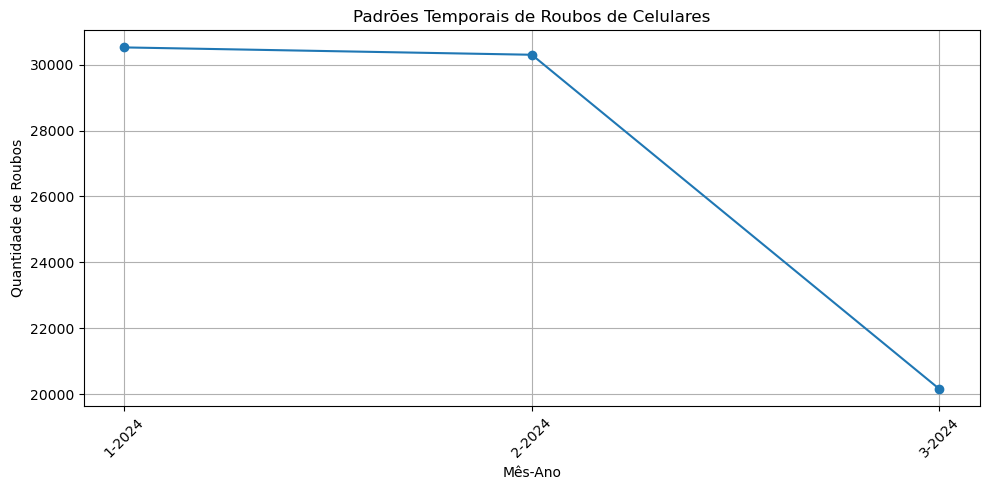

In [7]:
import matplotlib.pyplot as plt

# Agrupando por mês e ano para encontrar os padrões
temporal_group = data.groupby(['ANO', 'MES']).size().reset_index(name='Quantidade')
temporal_group['Mês-Ano'] = temporal_group['MES'].astype(str) + "-" + temporal_group['ANO'].astype(str)

# Plotando os dados
plt.figure(figsize=(10, 5))
plt.plot(temporal_group['Mês-Ano'], temporal_group['Quantidade'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Mês-Ano')
plt.ylabel('Quantidade de Roubos')
plt.title('Padrões Temporais de Roubos de Celulares')
plt.grid(True)
plt.tight_layout()
plt.show()


## 3 - Análise de Frequência
### A contagem da frequência de subtrações por delegacia ou distrito é essencial para identificar as áreas mais afetadas:

In [8]:
# Contagem por delegacia
delegacia_count = data['NOME_DELEGACIA'].value_counts()

# Exibindo as principais delegacias
print("\nPrincipais delegacias com maior número de ocorrências:")
print(delegacia_count.head(10))



Principais delegacias com maior número de ocorrências:
NOME_DELEGACIA
DELEGACIA ELETRONICA        42221
DELEGACIA ELETRONICA 1       4539
DELEGACIA ELETRONICA 3       1632
DELEGACIA ELETRONICA 2       1112
49º D.P. SAO MATEUS           390
44º D.P. GUAIANAZES           332
DEL.POL.ITAQUAQUECETUBA       324
73º D.P. JACANA               323
16º D.P. VILA CLEMENTINO      304
89º D.P. JARDIM TABOAO        287
Name: count, dtype: int64


## 4 - Mapeamento Geográfico
### 
Para o mapeamento geográfico, precisaremos de coordenadas ou informações sobre os bairros. Supondo que tenhamos coordenadas (latitude e longitude), a visualização poderia ser feita com Folium:

In [9]:
# Contagem das diferentes delegacias envolvidas
print("\nContagem de ocorrências por cidade:")
print(data['CIDADE'].value_counts())


Contagem de ocorrências por cidade:
CIDADE
S.PAULO                42883
GUARULHOS               2270
CAMPINAS                1748
S.ANDRE                 1738
S.BERNARDO DO CAMPO     1695
                       ...  
OLEO                       1
ONDA VERDE                 1
OSCAR BRESSANE             1
LUPERCIO                   1
NEVES PAULISTA             1
Name: count, Length: 542, dtype: int64


In [10]:
# Filtrando apenas as ocorrências na cidade de São Paulo
sao_paulo_data = data[data['NOME_MUNICIPIO'].str.contains('S.PAULO', case=False, na=False)]

# Agrupando e contando a quantidade de ocorrências por bairro em São Paulo
contagem_bairro_sp = sao_paulo_data.groupby('BAIRRO').size().reset_index(name='Quantidade')

# Ordenando pela quantidade, do maior para o menor
contagem_bairro_sp_sorted = contagem_bairro_sp.sort_values(by='Quantidade', ascending=False)

# Exibindo as primeiras linhas do resultado
print(contagem_bairro_sp_sorted.head(10))


            BAIRRO  Quantidade
831      PINHEIROS        1202
25      BELA VISTA        1057
854      REPUBLICA        1043
1107  VILA MARIANA        1005
22     BARRA FUNDA         917
200     ITAIM BIBI         768
164     CONSOLACAO         745
104   CIDADE DUTRA         731
873        SANTANA         712
29      BOM RETIRO         637


In [11]:
# Identificando registros com coordenadas inválidas (0, 0 ou NaN)
invalid_coords = data[
    (data['LATITUDE'].isna()) |
    (data['LONGITUDE'].isna()) |
    (data['LATITUDE'] == 0) |
    (data['LONGITUDE'] == 0)
]

# Contando quantos registros serão perdidos
num_invalid = len(invalid_coords)
print(f"Registros com coordenadas inválidas (0 ou NaN): {num_invalid}")

# Removendo registros inválidos
geo_data_clean = data.drop(invalid_coords.index)

# Verificando o total de registros restantes
num_total = len(data)
num_clean = len(geo_data_clean)
print(f"Registros totais antes da limpeza: {num_total}")
print(f"Registros válidos após a limpeza: {num_clean}")


Registros com coordenadas inválidas (0 ou NaN): 16498
Registros totais antes da limpeza: 80985
Registros válidos após a limpeza: 64487


In [12]:
import folium

# Exemplo de ponto central da cidade de São Paulo
map_sp = folium.Map(location=[-23.550520, -46.633308], zoom_start=12)

# Adicionando os pontos ao mapa (substitua 'LATITUDE' e 'LONGITUDE' pelos nomes corretos das colunas)
for index, row in geo_data_clean.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']], radius=3, color='blue', fill=True).add_to(map_sp)

# Salvando o mapa
map_sp.save('mapa_roubos_celulares.html')


In [13]:
from folium.plugins import HeatMap

# Exemplo de ponto central da cidade de São Paulo
heatmap_sp = folium.Map(location=[-23.550520, -46.633308], zoom_start=12)

# Preparando os dados para o mapa de calor (lista de listas [latitude, longitude])
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in geo_data_clean.iterrows()]

# Adicionando o mapa de calor ao mapa existente
HeatMap(heat_data).add_to(heatmap_sp)

# Salvar o mapa como HTML
heatmap_sp.save('mapa_calor_ocorrencias.html')


In [14]:
from folium.plugins import HeatMap
from folium import FeatureGroup, LayerControl

# Criando o mapa base centrado na cidade de São Paulo
map_sp = folium.Map(location=[-23.550520, -46.633308], zoom_start=12)

# Criando um grupo de recursos para os pontos
pontos_layer = FeatureGroup(name='Pontos de Ocorrência').add_to(map_sp)

# Adicionando os pontos ao grupo de recursos
for index, row in geo_data_clean.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']], radius=3, color='blue', fill=True).add_to(pontos_layer)

# Preparando os dados para o mapa de calor (lista de listas [latitude, longitude])
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in geo_data_clean.iterrows()]

# Criando um grupo de recursos para o mapa de calor
heat_layer = FeatureGroup(name='Mapa de Calor').add_to(map_sp)

# Adicionando o mapa de calor ao grupo de recursos
HeatMap(heat_data).add_to(heat_layer)

# Adicionando o controle de camadas ao mapa
LayerControl().add_to(map_sp)

# Salvando o mapa atualizado com controle de camadas
map_sp.save('mapa_roubos_celulares_com_calor_e_camadas.html')


## 5 - Correlação com Outras Variáveis
### Para verificar correlações, podemos explorar as relações entre variáveis numéricas e também categorias, usando o método corr() do Pandas.

In [15]:
import geopandas as gpd

# Carregar o shapefile com os limites municipais
shapefile_path = 'data/SP_Municipios_2022.shp'
municipios_gdf = gpd.read_file(shapefile_path)

# Visualizar as primeiras linhas do GeoDataFrame
print(municipios_gdf.head())


    CD_MUN            NM_MUN SIGLA_UF  AREA_KM2        nome_munic  \
0  3500105        Adamantina       SP   411.987        ADAMANTINA   
1  3500204            Adolfo       SP   211.055            ADOLFO   
2  3500303             Aguaí       SP   474.554             AGUAI   
3  3500402    Águas da Prata       SP   142.673    AGUAS DA PRATA   
4  3500501  Águas de Lindóia       SP    60.126  AGUAS DE LINDOIA   

                                            geometry  
0  POLYGON ((-51.09557 -21.57029, -51.09617 -21.5...  
1  POLYGON ((-49.61249 -21.26110, -49.61249 -21.2...  
2  POLYGON ((-47.01254 -22.00527, -47.01219 -22.0...  
3  POLYGON ((-46.71875 -21.95837, -46.71878 -21.9...  
4  POLYGON ((-46.61761 -22.51172, -46.61864 -22.5...  


In [16]:
# Agrupando e contando ocorrências por município
contagem_municipios = geo_data_clean.groupby('NOME_MUNICIPIO').size().reset_index(name='Quantidade')

# Visualizando as primeiras linhas da contagem
print(contagem_municipios.head())


     NOME_MUNICIPIO  Quantidade
0        ADAMANTINA           6
1            ADOLFO           1
2             AGUAI          25
3    AGUAS DA PRATA           3
4  AGUAS DE LINDOIA           5


In [29]:
# Normalizar o nome dos municípios no shapefile para facilitar a mesclagem
municipios_gdf['nome_munic'] = municipios_gdf['nome_munic'].str.upper()

# Realizando a mesclagem
municipios_gdf = municipios_gdf.merge(contagem_municipios, left_on='nome_munic', right_on='NOME_MUNICIPIO', how='left')

# Preenchendo NaN com 0 para municípios sem ocorrências registradas
municipios_gdf['Quantidade'] = municipios_gdf['Quantidade'].fillna(0)

# Verificando a estrutura do GeoDataFrame após a mesclagem
print(municipios_gdf[['nome_munic', 'Quantidade']].head())


         nome_munic  Quantidade
0        ADAMANTINA         6.0
1            ADOLFO         1.0
2             AGUAI        25.0
3    AGUAS DA PRATA         3.0
4  AGUAS DE LINDOIA         5.0


In [41]:
import folium

# Criar o mapa centrado em uma área representativa de São Paulo
mapa_cidades = folium.Map(location=[-23.550520, -46.633308], zoom_start=6)

# Adicionar o mapa coroplético
choropleth = folium.Choropleth(
    geo_data=municipios_gdf,
    name='Ocorrências por Município',
    data=municipios_gdf,
    columns=['nome_munic', 'Quantidade'],
    key_on='feature.properties.nome_munic',
    fill_color='YlOrRd',  # Você pode escolher outra paleta
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Número de Ocorrências'
).add_to(mapa_cidades)

# Para adicionar tooltips, é necessário utilizar folium.GeoJson separadamente
folium.GeoJson(
    data=municipios_gdf,
    style_function=lambda feature: {
        'fillColor': choropleth.color_scale(feature['properties']['Quantidade']),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7,
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['nome_munic', 'Quantidade'],
        aliases=['Município:', 'Ocorrências:'],
        localize=True,
        sticky=False
    )
).add_to(mapa_cidades)


# Adicionar controle de camadas para alternar visualizações
folium.LayerControl().add_to(mapa_cidades)

# Salvar o mapa como HTML
mapa_cidades.save('mapa_coropletico_ocorrencias_municipios.html')


In [43]:
import folium

# Criar o mapa centrado em uma área representativa de São Paulo
mapa_cidades = folium.Map(location=[-23.550520, -46.633308], zoom_start=6)

# Definir os intervalos para a escala de cores
threshold_scale = [0, 10, 50, 10000, 20000, 36000]

# Adicionar o mapa coroplético com intervalos personalizados
choropleth=folium.Choropleth(
    geo_data=municipios_gdf,
    name='Ocorrências por Município',
    data=municipios_gdf,
    columns=['nome_munic', 'Quantidade'],
    key_on='feature.properties.nome_munic',
    fill_color='YlOrRd',  # Você pode escolher outra paleta
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Número de Ocorrências',
    threshold_scale=threshold_scale  # Aplicar a escala definida
).add_to(mapa_cidades)

# Utilizar folium.GeoJson para adicionar tooltips e pop-ups
folium.GeoJson(
    data=municipios_gdf,
    style_function=lambda feature: {
        'fillColor': choropleth.color_scale(feature['properties']['Quantidade']),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7,
    },
    popup=folium.features.GeoJsonPopup(
        fields=['nome_munic', 'Quantidade'],
        aliases=['Município:', 'Ocorrências:'],
        localize=True
    )
).add_to(mapa_cidades)

# Adicionar controle de camadas para alternar visualizações
folium.LayerControl().add_to(mapa_cidades)

# Salvar o mapa como HTML
mapa_cidades.save('mapa_coropletico_ocorrencias_municipios.html')


In [25]:
pip install jenkspy


  Obtaining dependency information for jenkspy from https://files.pythonhosted.org/packages/26/1e/dd9cbb0694a36a52fe1d0d63db9627b58c9491f3249aed3fe4b9c6bc79da/jenkspy-0.4.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/224.4 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/224.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 224.4/224.4 kB 3.4 MB/s eta 0:00:00


In [35]:
import folium
import geopandas as gpd
import jenkspy


# Calcular os natural breaks (Jenks) para os valores de 'Quantidade'
breaks = jenkspy.jenks_breaks(municipios_gdf['Quantidade'], 7)  # 5 é o número de classes desejado

# Criar o mapa centrado no estado de São Paulo
mapa_cidades = folium.Map(location=[-23.550520, -46.633308], zoom_start=6)

# Adicionar o mapa coroplético com natural breaks
folium.Choropleth(
    geo_data=municipios_gdf,
    name='Ocorrências por Município',
    data=municipios_gdf,
    columns=['nome_munic', 'Quantidade'],
    key_on='feature.properties.nome_munic',
    fill_color='YlOrRd',  # Escolha a paleta de cores desejada
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Número de Ocorrências',
    threshold_scale=breaks  # Aplicar os natural breaks
).add_to(mapa_cidades)

# Adicionar controle de camadas
folium.LayerControl().add_to(mapa_cidades)

# Salvar o mapa como HTML
mapa_cidades.save('mapa_coropletico_ocorrencias_municipios_com_jenks.html')
